#Shared Bikes Demand Prediction - Assignment Solution

Problem Statement:

A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.


*   What are the variables are significant in predicting the demand for shared bikes 
*   How well those variables describe the bike demands

The solution is divided into the following sections:

* Data understanding, preparation and Data Visualisation
* Dummy Variables creation for Categorical Variables
* Splitting the Data into Training and Testing Sets
* Residual Analysis of the train data
* Model building, evaluation, and prediction

In [ ]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

# Supress the Warnings
import warnings
warnings.filterwarnings('ignore')




In [ ]:
#Reading and checking the data from day.csv
bike = pd.read_csv("day.csv")
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#1. Data Understanding

In [ ]:
bike.shape

(730, 16)

In [ ]:
bike.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no NULL or missing values in the variables.

#2. Data Preparation

In [ ]:
#season variable
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike['season'] = bike['season'].map(season_map)

In [ ]:
bike.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
196,197,16-07-2018,fall,0,7,0,6,0,1,28.153347,31.91315,58.5000,13.958914,2418,3505,5923
187,188,07-07-2018,fall,0,7,0,4,1,1,30.750000,34.34355,65.1250,10.666400,754,3838,4592
14,15,15-01-2018,spring,0,1,0,6,0,2,9.566653,12.40560,49.8750,10.583521,222,1026,1248
31,32,01-02-2018,spring,0,2,0,2,1,2,7.879134,11.72650,82.9565,3.565271,47,1313,1360
390,391,26-01-2019,spring,1,1,0,4,1,2,14.008347,17.80250,76.9583,4.917519,244,3831,4075


In [ ]:
#weekday variable
weekday_map={1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
bike['weekday'] = bike['weekday'].map(weekday_map)

In [ ]:
bike.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
9,10,10-01-2018,spring,0,1,0,Wed,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321
342,343,09-12-2018,winter,0,12,0,Sun,1,1,11.924153,15.87710,69.5833,5.542019,261,3359,3620
567,568,22-07-2019,fall,1,7,0,Tues,0,2,27.367500,31.15625,76.2500,6.292694,2544,4866,7410
67,68,09-03-2018,spring,0,3,0,Fri,1,2,12.129153,14.33040,77.5417,14.750050,191,1700,1891
387,388,23-01-2019,spring,1,1,0,Wed,1,2,8.951653,12.15290,91.1250,7.417436,145,2287,2432


In [ ]:
#Variable mnth
month_map={1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['mnth'] = bike['mnth'].map(month_map)

In [ ]:
bike.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
592,593,16-08-2019,fall,1,Aug,0,Sat,1,1,29.485847,32.73440,51.9167,9.500332,1338,6267,7605
443,444,20-03-2019,spring,1,Mar,0,Thurs,1,1,22.994153,26.92665,80.7917,8.125157,1051,5042,6093
44,45,14-02-2018,spring,0,Feb,0,Wed,1,1,17.015000,19.91750,37.5833,27.999836,208,1705,1913
192,193,12-07-2018,fall,0,Jul,0,Thurs,1,1,32.560847,36.96375,55.9167,13.417018,662,3596,4258
589,590,13-08-2019,fall,1,Aug,0,Wed,1,1,29.554153,33.11270,54.5417,9.126204,1207,5676,6883


In [ ]:
#Variable weathersit
weathersit_map={1: 'Clear', 2: 'Mist', 3: 'Light_snow', 4: 'Heavy_rain'}
bike['weathersit'] = bike['weathersit'].map(weathersit_map)

In [ ]:
bike.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
620,621,13-09-2019,fall,1,Sep,0,Sat,1,Clear,25.112500,28.97790,63.7083,5.542294,1054,6750,7804
171,172,21-06-2018,fall,0,Jun,0,Thurs,1,Mist,27.914153,31.88230,77.0417,11.458675,774,4061,4835
489,490,05-05-2019,summer,1,May,0,Mon,0,Mist,25.488347,29.23040,75.6667,10.250464,2496,4387,6883
445,446,22-03-2019,summer,1,Mar,0,Sat,1,Clear,22.720847,26.57835,83.1250,7.876654,1334,5537,6871
104,105,15-04-2018,summer,0,Apr,1,Sun,0,Clear,18.313347,22.09565,67.1250,15.167125,642,2484,3126


### 2.(a) Dropping unwanted variables

In [ ]:
#Dropping casual and registered variables as cnt variable is the target variable and it's the addition of both casual & registered columns
bike=bike.drop(['casual','registered'],axis=1)

In [ ]:
bike.shape

(730, 14)

In [ ]:
#Dropping instant and dteday as these columns will not be useful in analysis
bike=bike.drop(['instant','dteday'],axis=1)

In [ ]:
bike.shape

(730, 12)

In [ ]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#3.Visualising the Data

####3.(a) Visualization of Numeric Variables

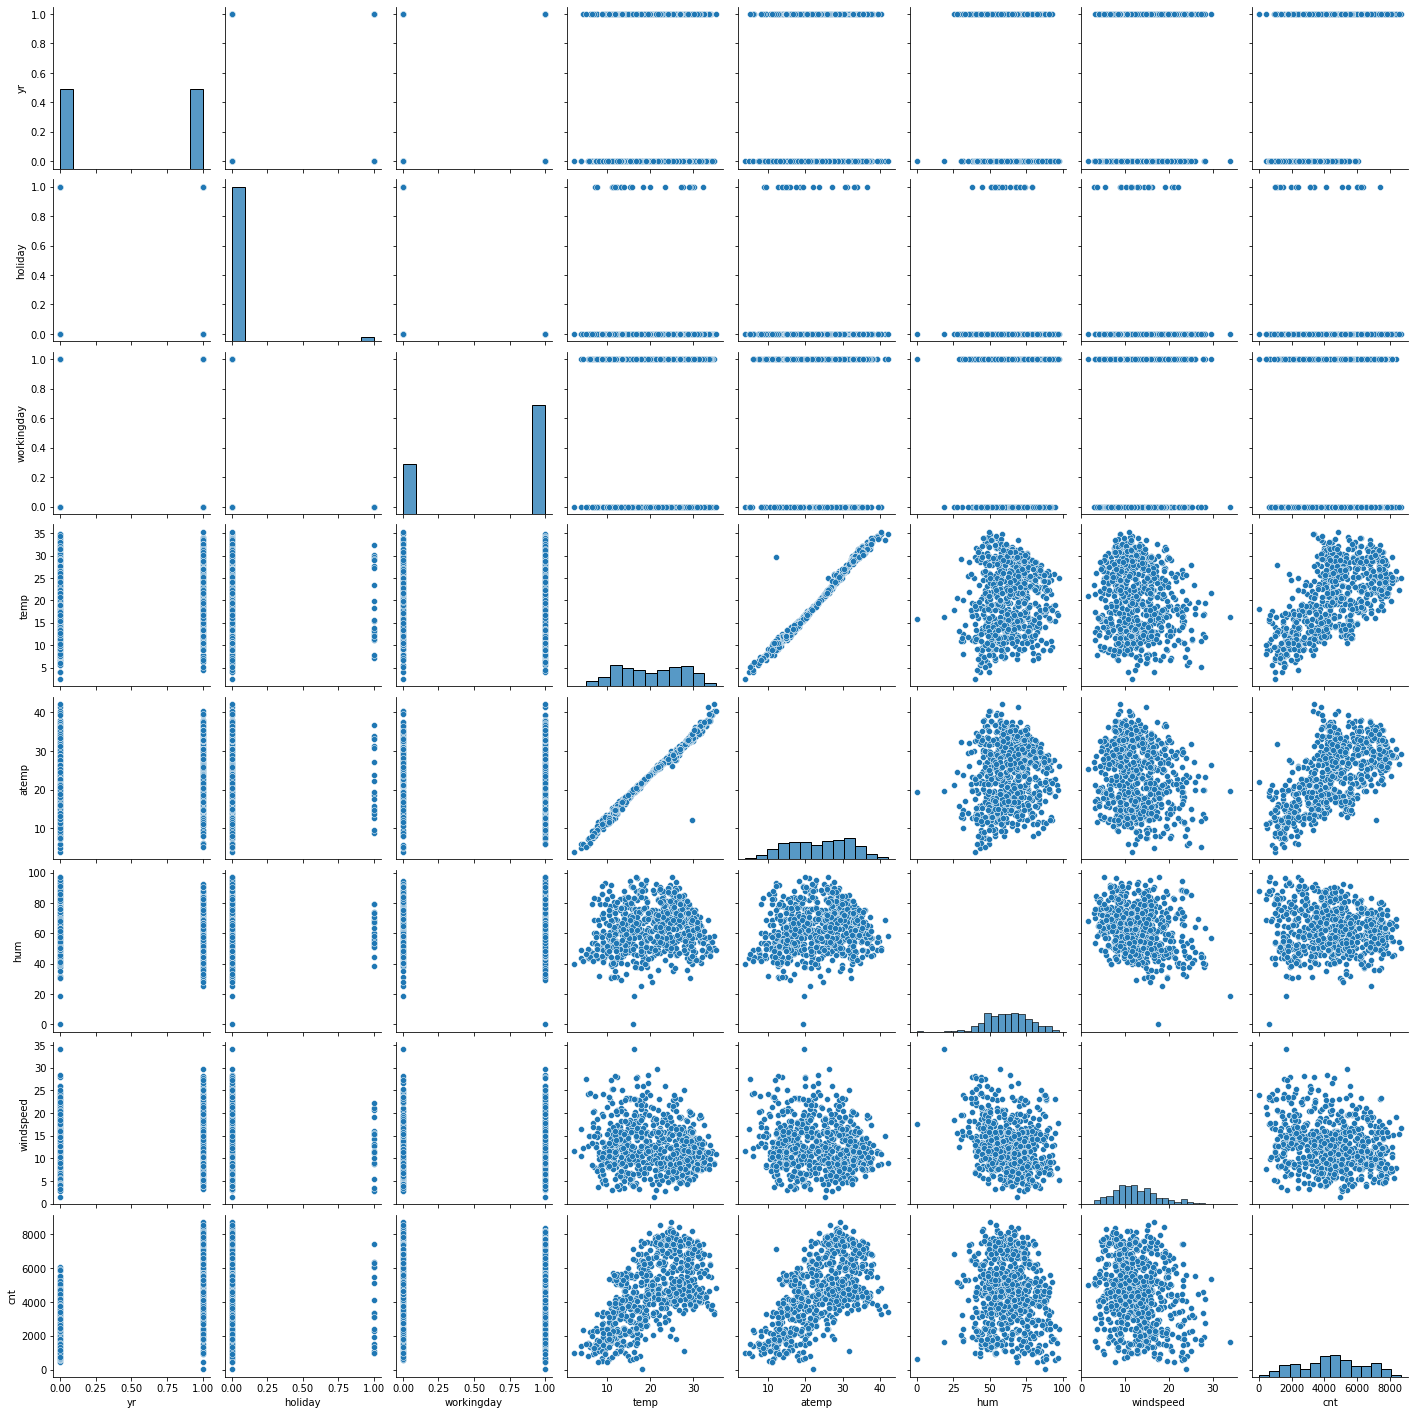

In [ ]:
sns.pairplot(bike)
plt.show()

####3.(b) Visualizing catagorical variables

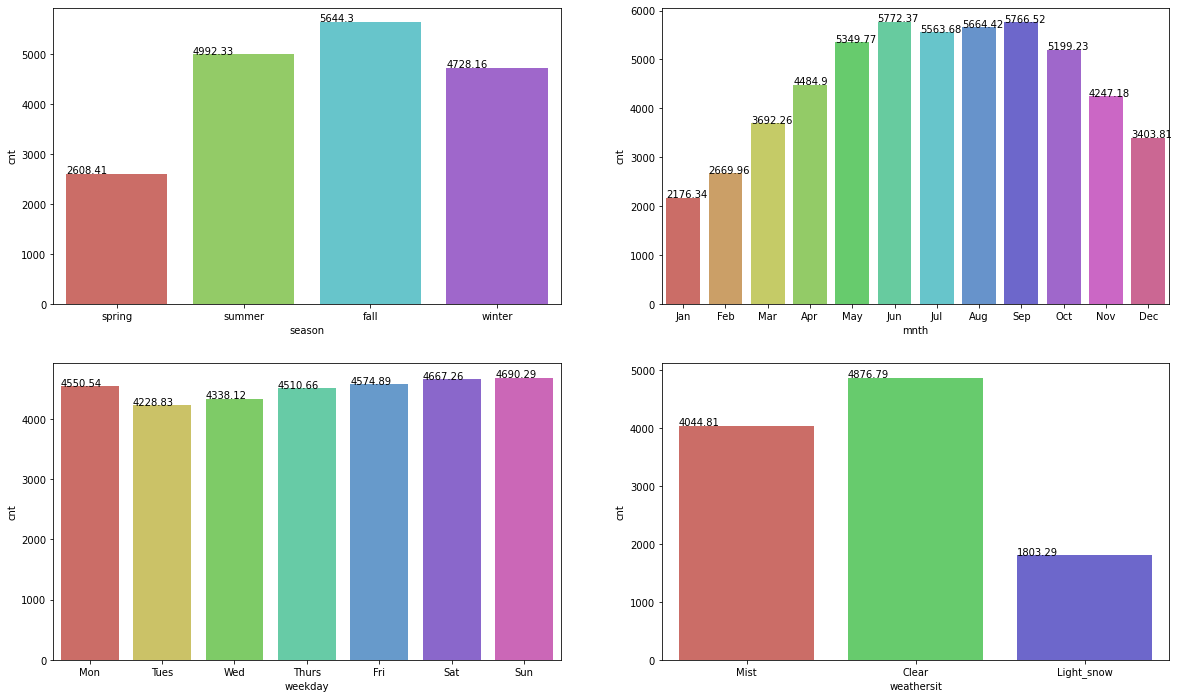

In [ ]:
def add_labels_to_barplot(ax):
  for p in ax.patches:
    ax.annotate('{:}'.format(round(p.get_height(),2)),(p.get_x(),p.get_height()))

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
ax = sns.barplot(x = 'season', y = 'cnt', data = bike, palette = 'hls', ci=None)
add_labels_to_barplot(ax)

plt.subplot(2,2,2)
ax = sns.barplot(x = 'mnth', y = 'cnt', data = bike, palette = 'hls', ci=None)
add_labels_to_barplot(ax)

plt.subplot(2,2,3)
ax = sns.barplot(x = 'weekday', y = 'cnt', data = bike, palette = 'hls', ci=None)
add_labels_to_barplot(ax)

plt.subplot(2,2,4)
ax = sns.barplot(x = 'weathersit', y = 'cnt', data = bike, palette = 'hls', ci=None)
add_labels_to_barplot(ax)

plt.show()



Insights:

There are 4 categorical variables in the dataset.

The Bar plot is used to study their effect on the dependent variable (‘cnt’) .

season: Bike booking were happening in 'fall' season followed by 'summer' & 'winter'. This indicates, season can be a good predictor for the dependent variable.

mnth: Maximum Bike booking happened over the months from May to September with a peak in June. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Over 45% of the bike booking were happening during Clear weather followed by . This was followed by Mist weather with more than 37%. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

weekday: It's not clear if weekday variable a good predictor for the target variable. But, Saturday and Sunday most of the people avail bike rental service.

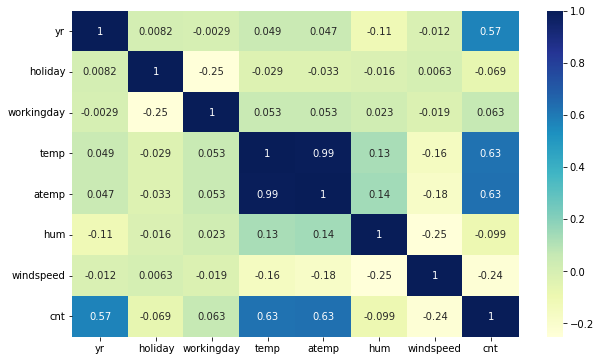

In [ ]:
#Heatmap to see correlation
plt.figure(figsize=(10, 6))
sns.heatmap(bike.corr(), cmap="YlGnBu", annot = True)
plt.show()

##4.Dummy Variables creation for Categorical Variables

4.(a)Dummy variables for season variables

In [ ]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_dummy'
season_dummy = pd.get_dummies(bike['season'])

In [ ]:
season_dummy.sample(10)

,fall,spring,summer,winter
585,1,0,0,0
397,0,1,0,0
70,0,1,0,0
192,1,0,0,0
626,1,0,0,0
45,0,1,0,0
142,0,0,1,0
298,0,0,0,1
280,0,0,0,1
525,0,0,1,0


In [ ]:
# Dropping the first column from season_dummy dataframe using 'drop_first = True'

season_dummy = pd.get_dummies(bike['season'], drop_first = True)

In [ ]:
season_dummy

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [ ]:
# Adding the results to the original bike dataframe i.e the new variables
bike = pd.concat([bike, season_dummy], axis = 1)

In [ ]:
bike.shape

(730, 15)

In [ ]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [ ]:
# Dropping 'season' as we have created the dummies for it

bike.drop(['season'], axis = 1, inplace = True)

In [ ]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


4.(b)Dummy variables for weekday

In [ ]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_dummy'
weekday_dummy = pd.get_dummies(bike['weekday'])

In [ ]:
weekday_dummy.sample(5)

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
127,0,0,0,0,0,1,0
72,0,0,0,0,0,0,1
688,0,0,0,0,1,0,0
579,0,0,0,1,0,0,0
130,1,0,0,0,0,0,0


In [ ]:
# Dropping the first column from weekday_dummy dataframe using 'drop_first = True'

weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True)

In [ ]:
weekday_dummy

,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


In [ ]:
# Adding the results to the original bike dataframe i.e the new variables to bike df
bike = pd.concat([bike, weekday_dummy], axis = 1)

In [ ]:
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,Jan,0,Mon,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,0,0,0,0
1,0,Jan,0,Tues,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0
2,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1
3,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0


In [ ]:
# Dropping 'weekday' as we have created the dummies for it

bike.drop(['weekday'], axis = 1, inplace = True)

4.(c)Dummy variables for mnth column

In [ ]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'mnth_dummy'
mnth_dummy = pd.get_dummies(bike['mnth'])

In [ ]:
mnth_dummy.sample(5)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
358,0,0,1,0,0,0,0,0,0,0,0,0
592,0,1,0,0,0,0,0,0,0,0,0,0
474,1,0,0,0,0,0,0,0,0,0,0,0
469,1,0,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Dropping the first column from mnth_dummy dataframe using 'drop_first = True'

mnth_dummy = pd.get_dummies(bike['mnth'], drop_first = True)

In [ ]:
# Adding the results to the original bike dataframe i.e the new variables to bike df
bike = pd.concat([bike, mnth_dummy], axis = 1)

In [ ]:
bike.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Dropping 'mnth' as we have created the dummies for it

bike.drop(['mnth'], axis = 1, inplace = True)

In [ ]:
bike

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,Mist,10.420847,11.33210,65.2917,23.458911,2114,1,...,1,0,0,0,0,0,0,0,0,0
726,1,0,1,Mist,10.386653,12.75230,59.0000,10.416557,3095,1,...,1,0,0,0,0,0,0,0,0,0
727,1,0,0,Mist,10.386653,12.12000,75.2917,8.333661,1341,1,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,Clear,10.489153,11.58500,48.3333,23.500518,1796,1,...,1,0,0,0,0,0,0,0,0,0


4.(d) Dummy variable for weathersit variable

In [ ]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_dummy'
weathersit_dummy = pd.get_dummies(bike['weathersit'])

In [ ]:
weathersit_dummy.sample(5)

,Clear,Light_snow,Mist
528,1,0,0
387,0,0,1
469,1,0,0
181,1,0,0
297,1,0,0


In [ ]:
# Dropping the first column from weathersit_dummy dataframe using 'drop_first = True'

weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True)

In [ ]:
weathersit_dummy

,Light_snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [ ]:
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Adding the results to the original bike dataframe i.e the new variables to bike data frame
bike = pd.concat([bike, weathersit_dummy], axis = 1)

In [ ]:
bike.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_snow,Mist
0,0,0,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Dropping 'weathersit' as we have created the dummies for it

bike.drop(['weathersit'], axis = 1, inplace = True)

In [ ]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Mon         730 non-null    uint8  
 12  Sat         730 non-null    uint8  
 13  Sun         730 non-null    uint8  
 14  Thurs       730 non-null    uint8  
 15  Tues        730 non-null    uint8  
 16  Wed         730 non-null    uint8  
 17  Aug         730 non-null    uint8  
 18  Dec         730 non-null    uint8  
 19  Feb         730 non-null    u

#5. Splitting the Data into Training and Testing Sets

In [ ]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

###5.(a) Rescaling the Features

In [ ]:
#standardization or normalization is required, so that the units of the coefficients obtained are all on the same scale

scaler = MinMaxScaler()

In [ ]:
# Applying scaler() to all the columns except the '1-0' and 'dummy' variables
var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [ ]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_snow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_train.describe() 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_snow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


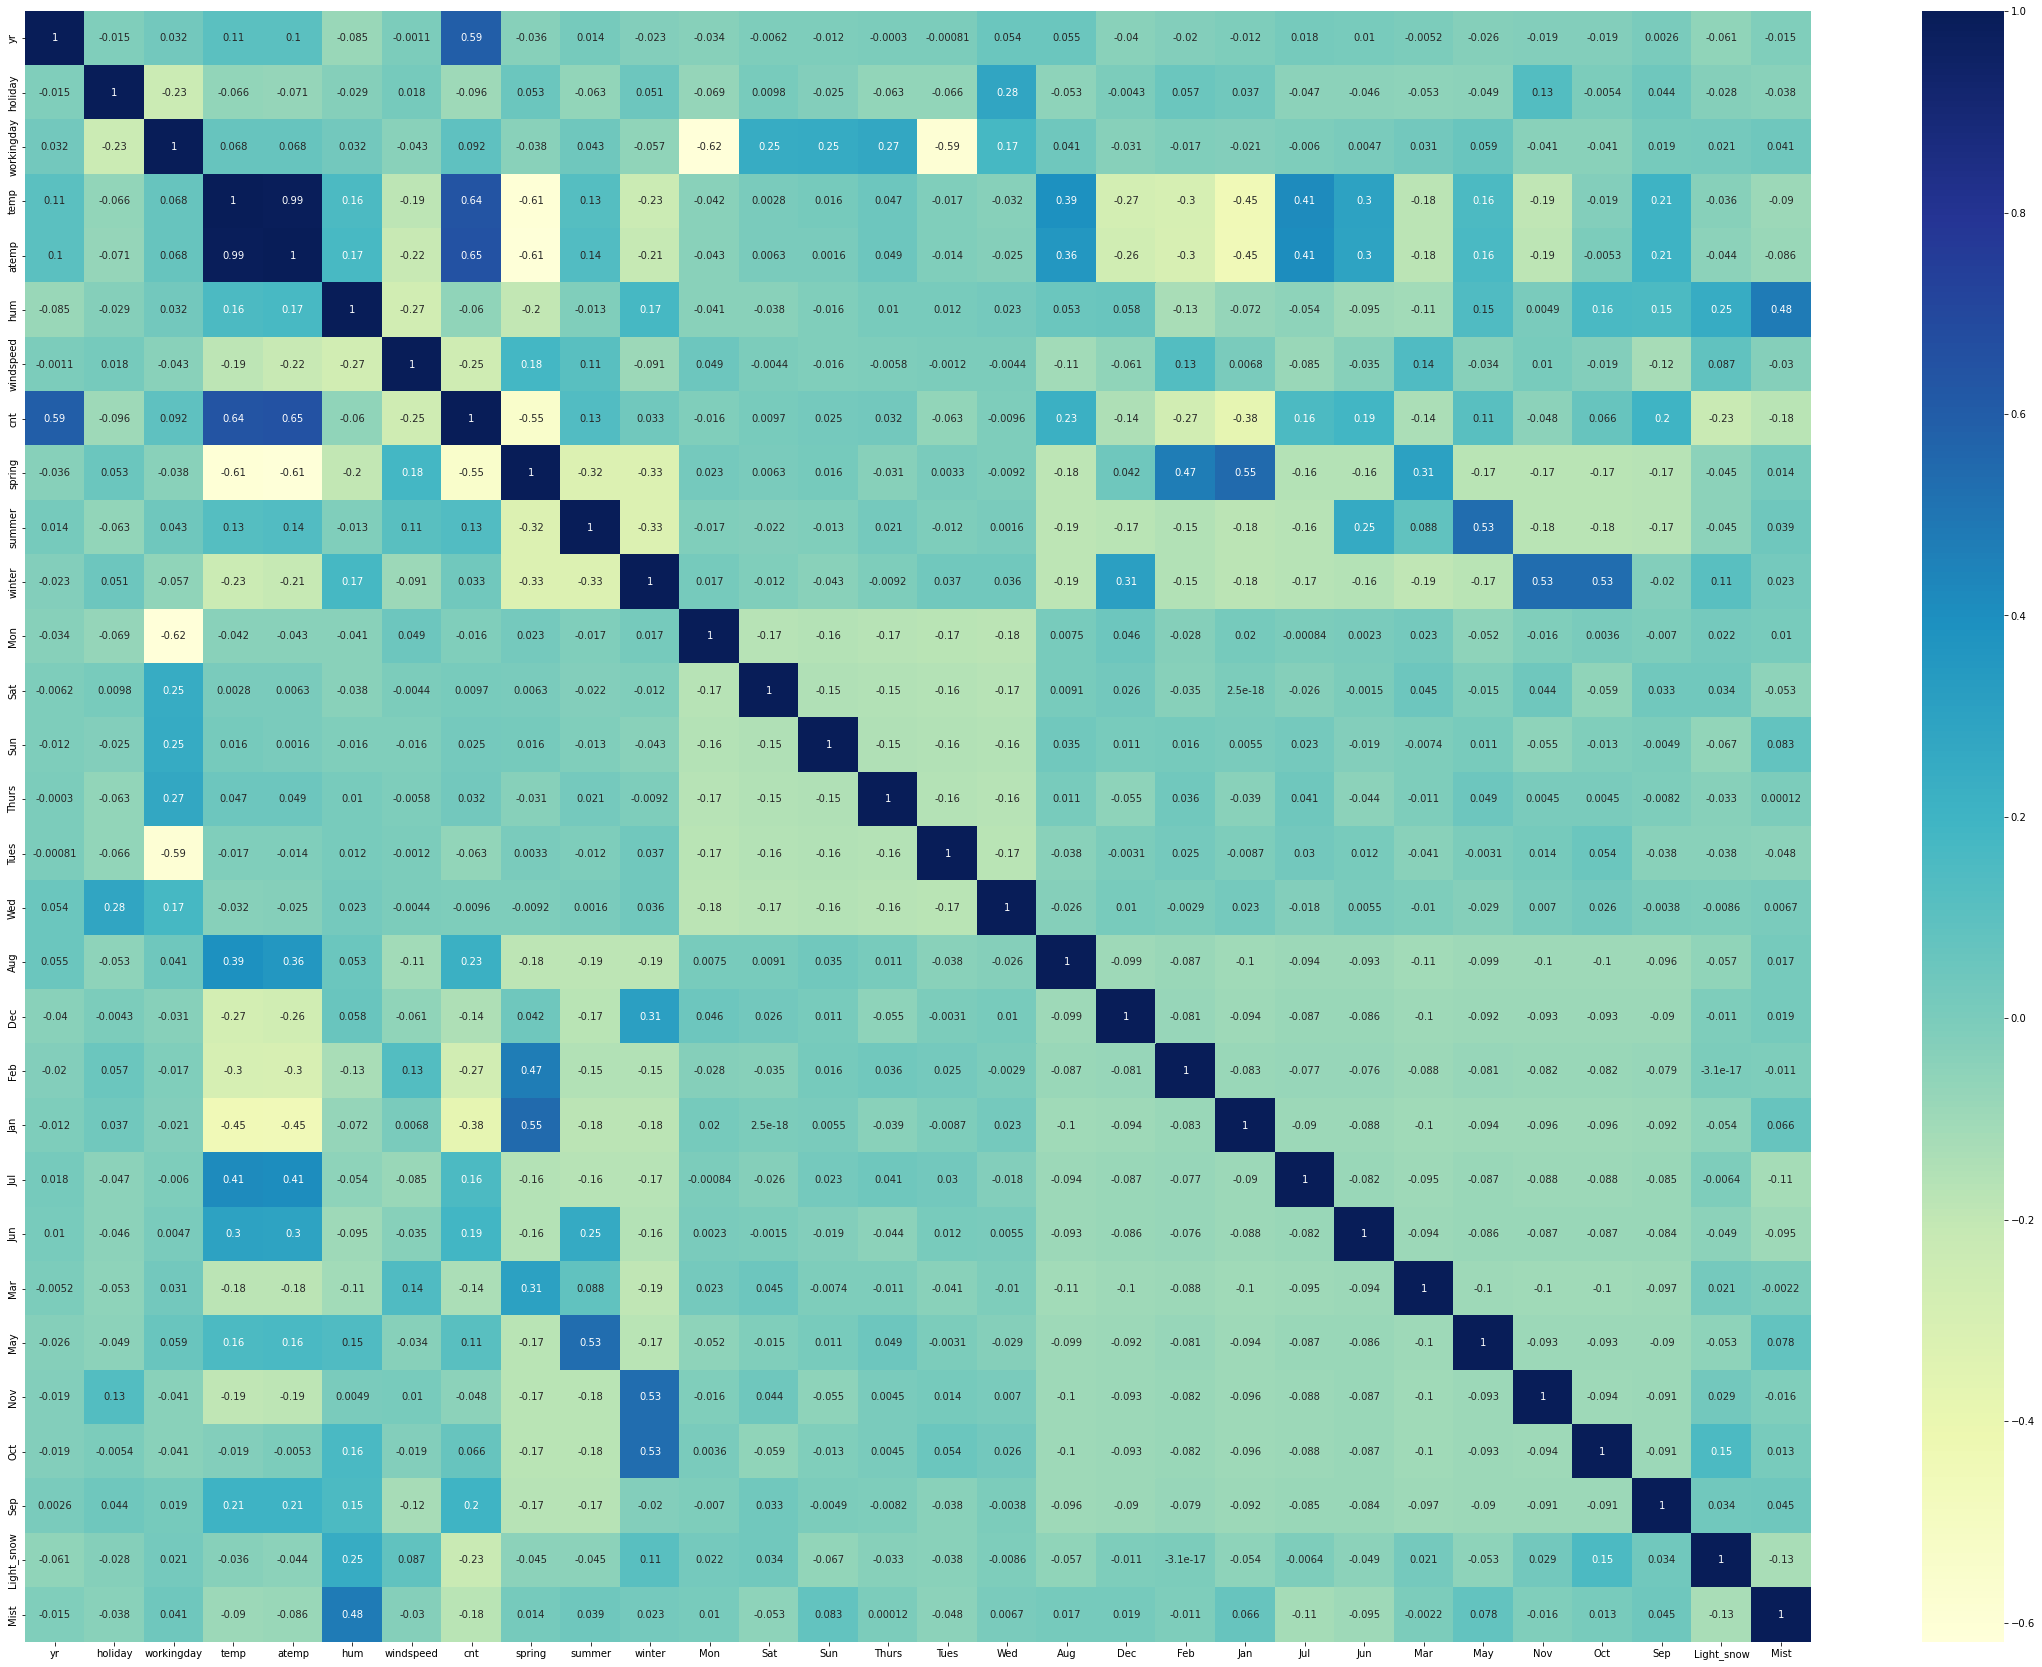

In [ ]:
# correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

'temp' feature is highly correlated to the target variable 'cnt'

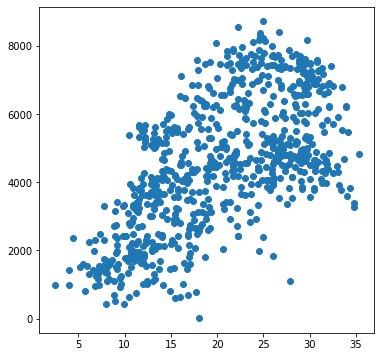

In [ ]:
plt.figure(figsize=[6,6])
plt.scatter(bike.temp, bike.cnt)
plt.show()

For the model building, dividing the train data into X and Y sets

In [ ]:
y_train = df_train.pop('cnt')
X_train = df_train

#6. Model building

In [ ]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#See the ranking of features ---to check which feature is less/more important as per RFE feature selection 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 13),
 ('Sun', False, 12),
 ('Thurs', False, 10),
 ('Tues', True, 1),
 ('Wed', False, 9),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Light_snow', True, 1),
 ('Mist', True, 1)]

In [ ]:
#important/selected features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Mon', 'Tues', 'Jul', 'Sep', 'Light_snow', 'Mist'],
      dtype='object')

In [ ]:
#less imp features
X_train.columns[~rfe.support_]

Index(['atemp', 'Sat', 'Sun', 'Thurs', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan',
       'Jun', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

###6.(a)Building model using statsmodel, for the detailed statistics

In [ ]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

Model-1

In [ ]:
# Adding a constant variable as in statsmodel as there is no intercept/constant
 
X_train_lm = sm.add_constant(X_train_rfe)

In [ ]:
#Run the linear model
lm = sm.OLS(y_train,X_train_lm).fit() 

In [ ]:
#see the summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.13e-191
Time:                        23:25:45   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1989      0.028      7.181      0.0

Check for the VIF values of the feature variables. 

In [ ]:
# Create a dataframe that will contain the names of all the variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
2   workingday  50.69
9          Mon  12.20
10        Tues  11.79
6       spring   5.02
3         temp   3.62
8       winter   3.49
1      holiday   2.91
7       summer   2.61
4          hum   1.91
14        Mist   1.57
11         Jul   1.49
12         Sep   1.30
13  Light_snow   1.25
5    windspeed   1.20
0           yr   1.03


'holiday' variable 

In [ ]:
X = X.drop('holiday',1)

Model-2

In [ ]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lm_1 = sm.OLS(y_train,X_train_lm).fit() 

In [ ]:
#see the summary of the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.13e-191
Time:                        23:25:45   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1799      0.042      4.276      0.0

In [ ]:
# Create a dataframe that will contain the names of all the variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
3          hum  32.14
2         temp  18.98
1   workingday  18.41
8          Mon   4.91
4    windspeed   4.90
5       spring   4.80
9         Tues   4.76
7       winter   3.71
6       summer   3.03
13        Mist   2.31
0           yr   2.09
10         Jul   1.60
11         Sep   1.38
12  Light_snow   1.25


In [ ]:
X = X.drop('hum',1)

Model-3

In [ ]:
# Build 3rd fitted model
X_train_lm = sm.add_constant(X)
lm_2 = sm.OLS(y_train,X_train_lm).fit() 

In [ ]:
#see the summary of the linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          5.73e-189
Time:                        23:25:45   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.038      2.618      0.0

In [ ]:
# Create a dataframe that will contain the names of all the variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features    VIF
1   workingday  16.19
2         temp  12.73
3    windspeed   4.75
7          Mon   4.45
8         Tues   4.21
4       spring   3.82
6       winter   2.80
5       summer   2.75
0           yr   2.07
9          Jul   1.60
12        Mist   1.58
10         Sep   1.35
11  Light_snow   1.09


In [ ]:
#Dropping 'workingday' column which has high VIF
X = X.drop('workingday',1)

Model-4

In [ ]:
# Build 4th fitted model
X_train_lm = sm.add_constant(X)
lm_3 = sm.OLS(y_train,X_train_lm).fit() 

In [ ]:
#see the summary of the linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          1.01e-186
Time:                        23:25:46   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2005      0.030      6.771      0.0

In [ ]:
# Create a dataframe that will contain the names of all the variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

      Features   VIF
1         temp  5.17
2    windspeed  4.62
4       summer  2.23
3       spring  2.11
0           yr  2.07
5       winter  1.82
8          Jul  1.59
11        Mist  1.55
9          Sep  1.33
6          Mon  1.22
7         Tues  1.21
10  Light_snow  1.08


Conclusion: Model-4 is our final model as it has low p-values for all variables and low VIF values except temp which is close to 5.

#7. Residual Analysis of the train data

#####Assumption: Error terms are normally distributed with mean zero

In [ ]:
y_train_pred = lm_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

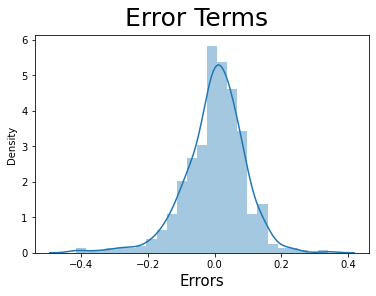

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 25)
plt.xlabel('Errors', fontsize = 15)  

Observation: Error is normally distributed here

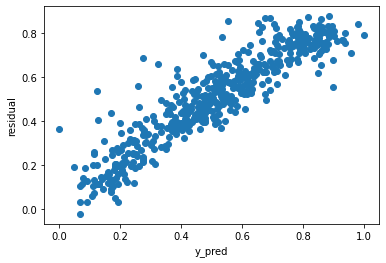

In [ ]:
#plot to see relationship between residuals and predicted values
res=y_train - y_train_pred
plt.scatter(y_train,y_train_pred)
plt.xlabel('y_pred')
plt.ylabel('residual') 
plt.show()

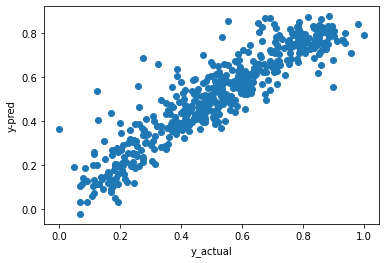

In [ ]:
#plot to see relationship between y-actual and predicted values
plt.scatter(y_train,y_train_pred)
plt.xlabel('y_actual')                         
plt.ylabel('y-pred') 
plt.show()

##8. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. lm_3 model

#####Applying the scaling on the test sets

In [ ]:
# Applying scaler()
var = ['temp','atemp', 'hum', 'windspeed', 'cnt']

df_test[var] = scaler.transform(df_test[var]) #as this is test data so only transform we are applying not fit()

In [ ]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light_snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Creating X_test_m dataframe by dropping variables from X_test
X_test_m = X_test[X.columns]

# Adding a constant variable 
X_test_lr = sm.add_constant(X_test_m)

In [ ]:
# Making predictions using the final model (lm_3)

y_pred_m = lm_3.predict(X_test_lr)

#9. Model Evaluation

Text(0, 0.5, 'y_pred')

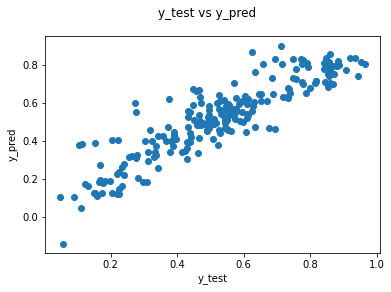

In [ ]:
# Plotting y_test and y_pred_m to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m)

fig.suptitle('y_test vs y_pred')           
plt.xlabel('y_test')                          
plt.ylabel('y_pred')   

##10. R-Square score for Test

In [ ]:
#Evaluation of R square for test data
r2=r2_score(y_test, y_pred_m)
print(r2)

0.8058142386351407


##11. Adjusted R-Square score for Test

In [ ]:
#Adjusted R square calculation

# n is number of rows in X

n = X_test_m.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_m.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7945024467109741

#12. Final Result Comparison
Train R^2 :83.7%

Train Adjusted R^2 :83.3%

Test R^2 :80.6%

Test Adjusted R^2 :79.4%

###Conclusion: This seems to be a really good model.
